**Project Objective:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Bookmarks to Notebook Sections
1. Go to <a href=#no1>Importing all the important libraries</a><br>
2. Go to <a href=#no2>Data Preparation</a><br>
&emsp;&emsp;2.1 Go to <a href=#no2.1>Train Data Set Creation</a><br>
&emsp;&emsp;2.2 Go to <a href=#no2.2>Validation Data Set Creation</a><br>
3. Go to <a href=#no3>Visualizing the Data</a><br>
4. Go to <a href=#no4>Model 0</a><br>
&emsp;&emsp;4.1 Go to <a href=#no4.1>Creating the Model</a><br>
&emsp;&emsp;4.2 Go to <a href=#no4.2>Compiling the Model</a><br>
&emsp;&emsp;4.3 Go to <a href=#no4.3>Training the Model</a><br>
&emsp;&emsp;4.4 Go to <a href=#no4.4>Visualizing the Training Results</a><br>
&emsp;&emsp;4.5 Go to <a href=#no4.5>Observations</a><br>
5. Go to <a href=#no5>Model 1</a><br>
&emsp;&emsp;5.1 Go to <a href=#no5.1>Creating the Model</a><br>
&emsp;&emsp;5.2 Go to <a href=#no5.2>Compiling the Model</a><br>
&emsp;&emsp;5.3 Go to <a href=#no5.3>Training the Model</a><br>
&emsp;&emsp;5.4 Go to <a href=#no5.4>Visualizing the Training Results</a><br>
&emsp;&emsp;5.5 Go to <a href=#no5.5>Observations</a><br>
6. Go to <a href=#no6>Data Augmentation</a><br>
&emsp;&emsp;6.1 Go to <a href=#no6.1>Specifying the Augmentation</a><br>
&emsp;&emsp;6.2 Go to <a href=#no6.2>Visualizing the Augmented Data</a><br>
7. Go to <a href=#no7>Model 2</a><br>
&emsp;&emsp;7.1 Go to <a href=#no7.1>Creating the Model</a><br>
&emsp;&emsp;7.2 Go to <a href=#no7.2>Compiling the Model</a><br>
&emsp;&emsp;7.3 Go to <a href=#no7.3>Training the Model</a><br>
&emsp;&emsp;7.4 Go to <a href=#no7.4>Visualizing the Training Results</a><br>
&emsp;&emsp;7.5 Go to <a href=#no7.5>Observations</a><br>
8. Go to <a href=#no8>Checking for Class Imbalance</a><br>
9. Go to <a href=#no9>Using Augmentor for Class Imbalance Treatment</a><br>
&emsp;&emsp;9.1 Go to <a href=#no9.1>Installing Augmentor</a><br>
&emsp;&emsp;9.2 Go to <a href=#no9.2>Using Augmentor</a><br>
&emsp;&emsp;9.3 Go to <a href=#no9.3>Observations</a><br>
10. Go to <a href=#no10>Modelling Data using Augmentor</a><br>
&emsp;&emsp;10.1 Go to <a href=#no10.1>Creating the Train Data Set</a><br>
&emsp;&emsp;10.2 Go to <a href=#no10.2>Creating the Validation Data Set</a><br>
11. Go to <a href=#no11>Model 3</a><br>
&emsp;&emsp;11.1 Go to <a href=#no11.1>Creating the Model</a><br>
&emsp;&emsp;11.2 Go to <a href=#no11.2>Compiling the Model</a><br>
&emsp;&emsp;11.3 Go to <a href=#no11.3>Training the Model</a><br>
&emsp;&emsp;11.4 Go to <a href=#no11.4>Visualizing the Training Results</a><br>
&emsp;&emsp;11.5 Go to <a href=#no11.5>Observations</a><br>

## 1. Importing all the important libraries <a name='no1' />

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This dataset has about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# # Defining the path for train and test images
# ## Todo: Update the paths of the train and test dataset
train_path="gdrive/My Drive/CNN/Skin_Data_Store/Train/"
test_path="gdrive/My Drive/CNN/Skin_Data_Store/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## 2. Data Preparation <a name='no2' />

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

### 2.1 Train Data Set Creation <a name='no2.1' />

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 20239 files belonging to 9 classes.
Using 16192 files for training.


### 2.2 Validation Data Set Creation <a name='no2.2' />

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 20239 files belonging to 9 classes.
Using 4047 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## 3. Visualizing the data <a name='no3' />

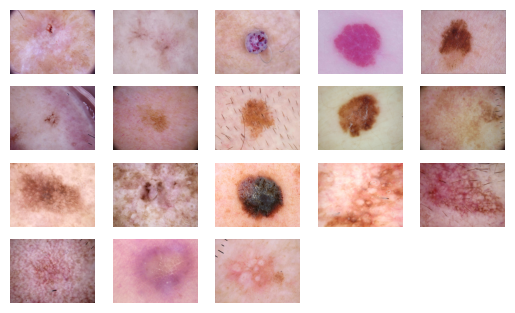

In [9]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(5,5,num+1)
        #plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model 0 <a name='no4' />

### 4.1 Creating the model <a name='no4.1' />

In [ ]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])


### 4.2 Compiling the model <a name='no4.2' />

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###  4.3 Training the model <a name='no4.3' />

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 40s 642ms/step - loss: 2.9659 - accuracy: 0.2087 - val_loss: 1.9284 - val_accuracy: 0.3512
Epoch 2/20
56/56 [==============================] - 34s 615ms/step - loss: 1.8175 - accuracy: 0.3438 - val_loss: 1.8234 - val_accuracy: 0.4094
Epoch 3/20
56/56 [==============================] - 35s 623ms/step - loss: 1.6747 - accuracy: 0.4174 - val_loss: 1.6012 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 35s 624ms/step - loss: 1.5072 - accuracy: 0.4810 - val_loss: 1.6060 - val_accuracy: 0.4273
Epoch 5/20
56/56 [==============================] - 35s 621ms/step - loss: 1.4614 - accuracy: 0.5117 - val_loss: 1.4860 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 35s 623ms/step - loss: 1.3541 - accuracy: 0.5301 - val_loss: 1.5256 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 35s 617ms/step - loss: 1.2664 - accuracy: 0.5636 - val_loss: 1.4141 - val_accuracy: 0.5257

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

###  4.4 Visualizing training results <a name='no4.4' />

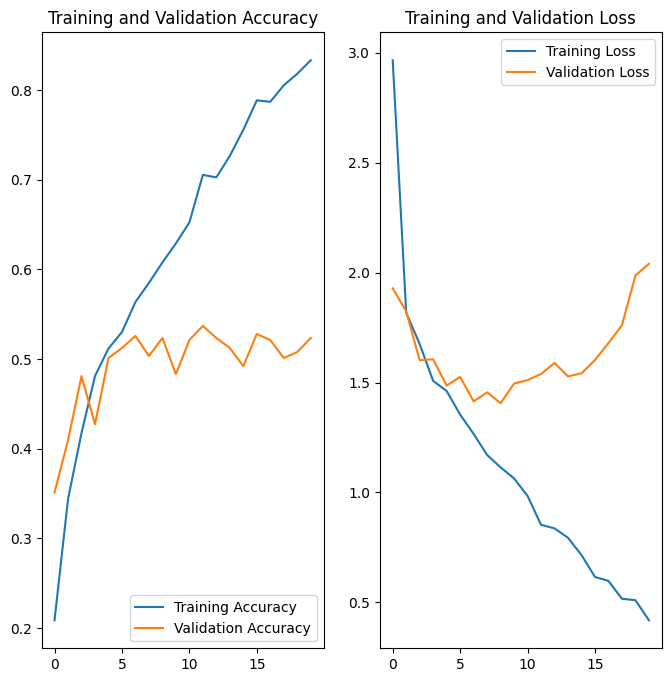

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###  4.5 Observations <a name='no4.5' />

-  The accuracy of the model for the **Training data set** is at **83%**. But the **Validation accuracy** is not in par with the training accuracy.
-  It is only at **52%**. The validation loss as observed is very high.
-  This could also be indicative of some **Overfit** in the model.
-  We could add some `Dropout` layers and remove the `BatchNormalization` layers.
-  And by adding a few more layers, we could improve the accuracy by trying to extract more features.

##  5. Model 1 <a name='no5' />

###  5.1 Creating the Model <a name='no5.1' />

In [ ]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### 5.2 Compiling the model <a name='no5.2' />

In [ ]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

###  5.3 Training the model <a name='no5.3' />

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 115s 2s/step - loss: 2.2198 - accuracy: 0.1920 - val_loss: 2.0392 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 111s 2s/step - loss: 2.0406 - accuracy: 0.1875 - val_loss: 2.0218 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 110s 2s/step - loss: 2.0286 - accuracy: 0.2093 - val_loss: 2.0225 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 110s 2s/step - loss: 2.0314 - accuracy: 0.1825 - val_loss: 2.0340 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 110s 2s/step - loss: 2.0287 - accuracy: 0.1987 - val_loss: 2.0253 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 110s 2s/step - loss: 2.0268 - accuracy: 0.1959 - val_loss: 2.0261 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 111s 2s/step - loss: 2.0206 - accuracy: 0.2031 - val_loss: 2.0286 - val_accuracy: 0.2058
Epoch 8/20
56

###  5.4 Visualizing the results <a name='no5.4' />

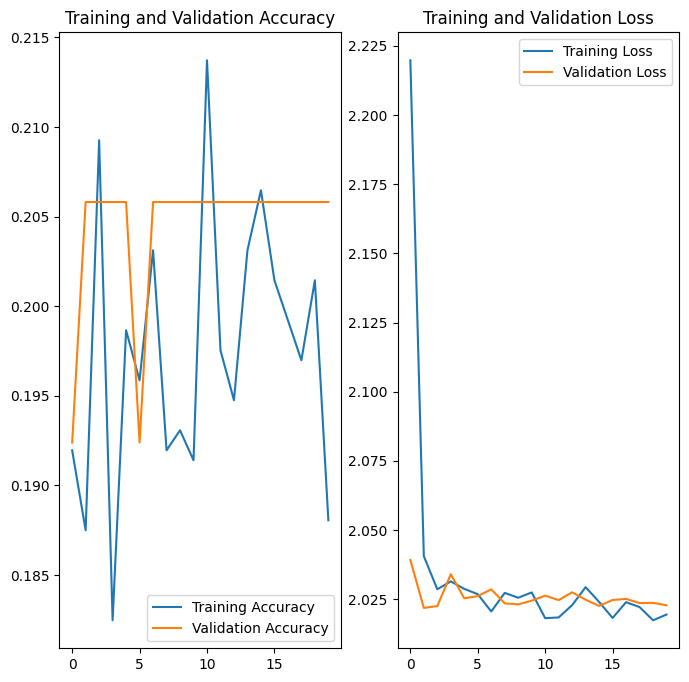

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###  5.5 Observations <a name='no5.5' />

-  The model accuracy for **Train data set** has dropped drastically
-  The accuracy for the **Validation set** has dropped drastically


##  6. Data Augmentation <a name='no6' />

###  6.1 Specifying the Augmentation <a name='no6.1' />

In [ ]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

###  6.2 Visualizing the Augmented Data <a name='no6.2' />

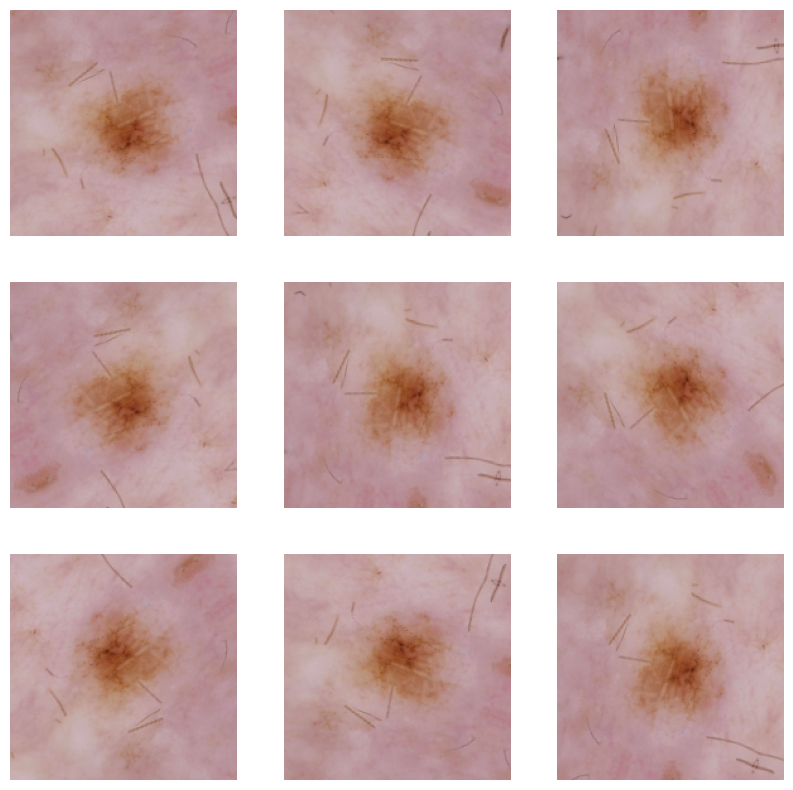

In [ ]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)
  plt.imshow((augmented_image1))
  plt.axis("off")

## 7. Model 2 <a name='no7' />

###  7.1 Creating the Model <a name='no7.1' />

In [ ]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### 7.2 Compiling the model <a name='no7.2' />

In [ ]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 7.3 Training the model <a name='no7.3' />

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 122s 2s/step - loss: 2.1083 - accuracy: 0.1925 - val_loss: 2.0407 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 117s 2s/step - loss: 2.0312 - accuracy: 0.1936 - val_loss: 2.0273 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 116s 2s/step - loss: 2.0327 - accuracy: 0.2042 - val_loss: 2.0320 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 117s 2s/step - loss: 2.0309 - accuracy: 0.1925 - val_loss: 2.0252 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 115s 2s/step - loss: 2.0302 - accuracy: 0.1936 - val_loss: 2.0385 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 117s 2s/step - loss: 2.0242 - accuracy: 0.2003 - val_loss: 2.0290 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 130s 2s/step - loss: 2.0216 - accuracy: 0.2048 - val_loss: 2.0207 - val_accuracy: 0.2058
Epoch 8/20
56

### 7.4 Visualizing the results <a name='no7.4' />

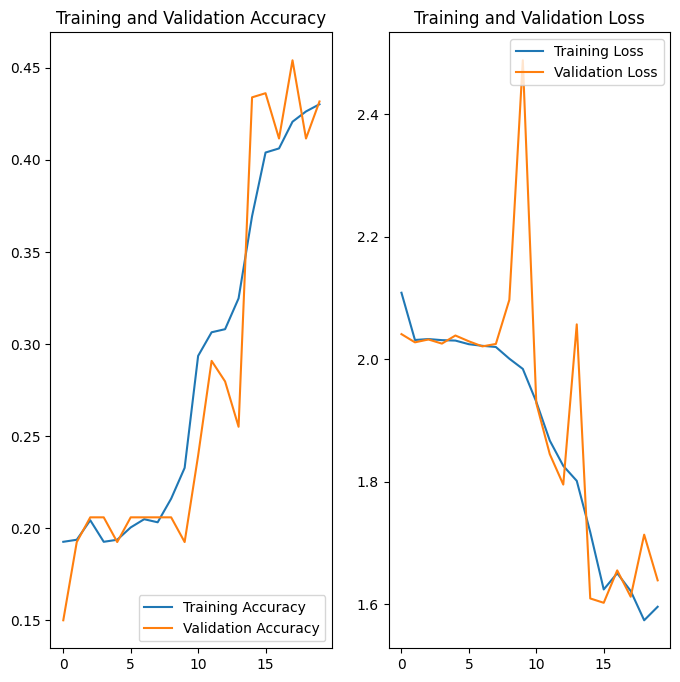

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 7.5  Observations <a name='no7.5' />

-  The model accuracy for **Train data set** is **42%**.
-  The accuracy for the **Validation set** is also at **41%**.
-  This is a much better model compared to the previous two models as there seems to be **No Overfit** with the training accuracy **42%** and validation accuracy at **41%**.
-  `Data Augmentation` has improved the model performance.

## 8. Checking for Class Imbalance <a name='no8' />

In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


-  The samples of various classes are not in equal proportion.
-  There is a significant **Class Imbalance** observed.
-  The class with the least number of samples is `Seborrheic Keratosis` with **77**.
-  The class that dominates the data in terms of proportionate number of samples is `Pigmented Benign Keratosis` with sample size of **462**.

## 9. Using Augmentor for Class Imbalance Treatment <a name='no9' />

###  9.1 Installing Augmentor <a name='no9.1' />

In [ ]:
!pip install Augmentor

You should consider upgrading via the 'C:\Users\kq250f\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


### 9.2 Using Augmentor <a name='no9.2' />

In [ ]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to data/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B6B6971BE0>: 100%|█| 500/500 [00:01<00:00, 266.06 Samples


Initialised with 376 image(s) found.
Output directory set to data/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B6B69A5100>: 100%|█| 500/500 [00:01<00:00, 274.51 Samples


Initialised with 95 image(s) found.
Output directory set to data/Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B6B696B160>: 100%|█| 500/500 [00:01<00:


Initialised with 438 image(s) found.
Output directory set to data/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B6BA824790>: 100%|█| 500/500 [00:09<00:00, 51.16 Samples


Initialised with 357 image(s) found.
Output directory set to data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B6B653D550>: 100%|█| 500/500 [00:08<00:00, 55.93 Sample


Initialised with 462 image(s) found.
Output directory set to data/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B6C1B30FD0>: 100%|█| 500/500 [00:02<00:00, 236.34 Samples


Initialised with 77 image(s) found.
Output directory set to data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B6B6704220>: 100%|█| 500/500 [00:04<00:00, 113.65 Sample


Initialised with 181 image(s) found.
Output directory set to data/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B6B669F070>: 100%|█| 500/500 [00:02<00:00, 244.90 Samples


Initialised with 139 image(s) found.
Output directory set to data/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B6BA7FECD0>: 100%|█| 500/500 [00:02<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


### 9.3 Observations <a name='no9.3' />

-  The Augmentor has **helped decrease the imbalance** in class images and that can be viewed from above.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

##  10. Modelling Augmented Data <a name='no10' />

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### 10.1 Creating the Train Data Set <a name='no10.1' />

In [ ]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### 10.2 Creating the Validation Data Set <a name='no10.2' />

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## 11. Model 3 <a name='no11' />

### 11.1 Creating the Model <a name='no11.1' />

In [ ]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### 11.2 Compiling the Model <a name='no11.2' />

In [ ]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 11.3 Training the Model <a name='no11.3' />

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 93s 544ms/step - loss: 2.5818 - accuracy: 0.1754 - val_loss: 1.9569 - val_accuracy: 0.2561
Epoch 2/30
169/169 [==============================] - 91s 535ms/step - loss: 1.7657 - accuracy: 0.3157 - val_loss: 1.5787 - val_accuracy: 0.4402
Epoch 3/30
169/169 [==============================] - 91s 536ms/step - loss: 1.5560 - accuracy: 0.4128 - val_loss: 1.4587 - val_accuracy: 0.4870
Epoch 4/30
169/169 [==============================] - 92s 546ms/step - loss: 1.4420 - accuracy: 0.4544 - val_loss: 1.3138 - val_accuracy: 0.5330
Epoch 5/30
169/169 [==============================] - 91s 540ms/step - loss: 1.3328 - accuracy: 0.4933 - val_loss: 1.2390 - val_accuracy: 0.5479
Epoch 6/30
169/169 [==============================] - 89s 528ms/step - loss: 1.2507 - accuracy: 0.5276 - val_loss: 1.2019 - val_accuracy: 0.5561
Epoch 7/30
169/169 [==============================] - 92s 542ms/step - loss: 1.1373 - accuracy: 0.5701 - val_loss: 1.1505 - val_ac

###  11.4 Visualizing the model results <a name='no11.4' />

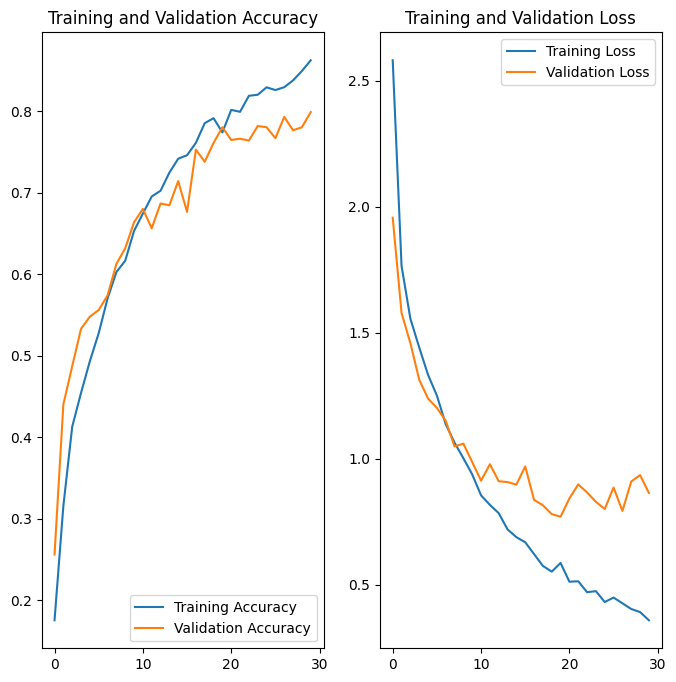

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 11.5 Observations <a name='no11.5' />

-  The training accuracy seems to be nearly **86%**.
-  The validation accuracy is nearly **~80%**.
-  Though the model accuracy has improved, the **class rebalance** has helped **treat the overfitting to some extent**.
-  Much better models could be built or tried out using **more epochs and more layers**.